# Fuerzas de ligadura | Péndulo rígido ideal

[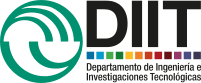](https://ingenieria.unlam.edu.ar/)  
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

# Enunciado 
Calcule la tensión de la cuerda con el método de multiplicadores de Lagrange.
La restricción es que la pesa se mantiene siempre en \\(\vec{r} = \ell \hat{\rho}\\), ergo la función que expresa esto es \\(f(\rho) = \rho - \ell = 0\\).

![](figuras/pénduloHorizontal.png)  

## Variables

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
# import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# Defino los parámetros físicos del sistema
m, g, l = sym.symbols('m, g, \ell', positive=True)
t = sym.symbols('t') # tiempo

# Defino coordenadas generalizadas 
phi, rho = mech.dynamicsymbols('phi, rho')
phi, rho

## Posición

In [3]:
# Sistema cartesiano
e = sym.physics.vector.ReferenceFrame('e') # marco referencial N en coordenadas cartesianas

# posición
m_r = rho* (sym.cos(phi)* (-e.y) + sym.sin(phi)* (e.x)) # recordemos que tomamos y hacia arriba

## Ligaduras

In [4]:
lambda1 = sym.symbols('lambda_1') # Tantos lambda como funciones de ligadura
f1 = sym.Eq(sym.Function('f_1')(rho), rho- l)
f1

## Energía cinética

In [4]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Multiplicación de símbolos Sympy (sympy.core.mul.Mul)
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    # velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

In [6]:
# Energía cinética del sistema
m_T = energíaCinéticaPartícula(m, m_r, e)
T = sym.Eq(sym.Symbol('T'), m_T ).simplify()
T

## Energía potencial

In [6]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Energía potencial gravitatoria: (sympy.core.mul.Mul)
        - (m \vec{g}) \cdot{r}
    """
    return - (masa* aceleracionGravitatoria).dot(posición)

In [8]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
m_V = energíaPotencialGravitatoria(m, m_r, g_vector)
V = sym.Eq(sym.Symbol('V'), m_V ).simplify()
V

## Lagrangiano y ecuaciones de Euler-Lagrange

Para ilustrar la obtenciónd de la ecuación de Euler-Lagrange que incluye fuerza de vínculo
$$
\frac{\partial}{\partial q_i} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} - \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j = 0 ,
$$
se calculará una vez manualmente cada término y el necesario Lagrangiano, para luego retomar el uso de funciones que automatizan tal proceso.

In [9]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs).simplify())
L

Las fuerzas generalizadas causadas por un potencial:

$$
\frac{\partial}{\partial q_i} \mathcal{L} .
$$

In [10]:
phi_dq = L.rhs.diff(phi)
rho_dq = L.rhs.diff(rho)

El simíl masa por aceleración, la derivada en el tiempo de los $p_i$:

$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} .
$$

In [11]:
phi_dtdp = L.rhs.diff(phi.diff(t)).diff(t)
rho_dtdp = L.rhs.diff(rho.diff(t)).diff(t)

Las fuerzas generalizadas de ligadura:

$$
Q_i = \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j .
$$

In [12]:
phi_Q = lambda1* f1.rhs.diff(phi)
rho_Q = lambda1* f1.rhs.diff(rho)

Juntando estos resultados pueden escribirse las ecuaciones de Euler-Lagrange que incluyen las fuerzas de vínculo. 

In [24]:
phi_EL = sym.Eq(phi_dq - phi_dtdp - phi_Q, 0) # ecuación igualando a cero
phi_EL.simplify()

In [25]:
rho_EL = sym.Eq(rho_dq - rho_dtdp - rho_Q, 0) # ecuación igualando a cero
rho_EL.simplify()

### Uso de funciones

Se calculan primero las ecuaciones sin los términos de fuerzas de vínculo
$$
\frac{\partial}{\partial q} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}} \mathcal{L} = 0
$$

In [28]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sym.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sym.Eq(
        lagrangiano.diff(coordenadaGeneralizada) 
        - lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        , 0
    ).simplify()

In [29]:
phi_EL = eulerLagrange(T, V, phi)
rho_EL = eulerLagrange(T, V, rho)
phi_EL, rho_EL

Y a estas se se adicionan los términos de las fuerzas generalizadas de ligadura
$$
Q_i = \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j ,
$$
que deben agregarse con signo negativo dado el órden que impusimos a los términos en las ecuaciones de Euler-Lagrange.

In [31]:
phi_EL = sym.Eq(phi_EL.lhs - phi_Q, 0) # ecuación igualando a cero
rho_EL = sym.Eq(rho_EL.lhs - rho_Q, 0) # ecuación igualando a cero
phi_EL, rho_EL

## Aplicación de la función de ligadura

Debe aplicarse ahora la función de restricción de la ligadura.
No solo hay que substituir en las ecuaciones de Euler-Lagrange el que

In [15]:
rho_f1 = sym.solve(f1.rhs, rho)[0]
sym.Eq(rho, rho_f1)

También se puede establere que la derivada primera y segunda con el tiempo de la función de restricción de la ligadura:

In [16]:
sym.Eq(f1.rhs.diff(t), 0)

In [17]:
sym.Eq(f1.rhs.diff(t,2), 0)

Se substituyen tales valores en la ecuaciones de Euler-Lagrange.

In [18]:
f1_subs = {
    rho : rho_f1,
    rho.diff(t): rho_f1.diff(t),
    rho.diff(t,2): rho_f1.diff(t,2)
}

In [19]:
phi_EL_subs = phi_EL.subs(f1_subs).simplify()
phi_EL_subs

In [20]:
rho_EL_subs = rho_EL.subs(f1_subs).simplify()
rho_EL_subs

De la primera se obtiene la ecuación de la dinámica para $\varphi$:

In [21]:
phi_pp = sym.solve(phi_EL_subs, phi.diff(t,2) )[0]
sym.Eq(phi.diff(t,2), phi_pp)

De la segunda se obtiene una función para $\lambda_1$

In [22]:
lambda1_funcion = sym.solve(rho_EL_subs, lambda1 )[0]
sym.Eq(lambda1, lambda1_funcion)

Como en este caso

$$
Q_\rho= \lambda_1(t) \frac{\partial}{\partial \rho} f_1 = \lambda_1(t),
$$
la expresión para la fuerza de ligadura que realiza la cuerda del péndulo, su tensión, es:

In [23]:
sym.Eq(sym.Symbol('Q_rho'), lambda1_funcion)